In [1]:
import os
from data_set import Dataset    
from torch.utils.data import DataLoader
# Define hyperparameters
num_epochs = 1
batch_size = 32
initial_lr = 0.001
data_path =os.path.join( os.getcwd(), "low_resInput")
train_loader = DataLoader(Dataset(data_path), batch_size=batch_size, shuffle=True)
print("Datadset input Completed")

/Users/felix/Documents/Internship實習/2023工研院/Code/low_resInput
['low_0062.JPG', 'low_0060.JPG', 'low_0074.JPG', 'low_0101.JPG', 'low_0061.JPG', 'low_0059.JPG', 'low_0110.JPG', 'low_0058.JPG', 'low_0072.JPG', 'low_0107.JPG', 'low_0073.JPG', 'low_0025.JPG', 'low_0095.JPG', 'low_0057.JPG', 'low_0109.JPG', 'low_0108.JPG', 'low_0044.JPG', 'low_0047.JPG']
/Users/felix/Documents/Internship實習/2023工研院/Code/low_resInput
Datadset input Completed


# Test of Semantics Perception Block

In [62]:
import torch
import torch.nn as nn

class Semantics(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Semantics, self).__init__()

        # Feature Extractor in Low-Resolution Branch
        self.conv1a = nn.Sequential(
            nn.Conv2d(in_channels, 4, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.conv2a = nn.Sequential(
            nn.Conv2d(4, 8, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.conv3a = nn.Sequential(
            nn.Conv2d(8, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.conv4a = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )

        # Semantics Perception Block
        self.conv_inb = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv1b = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool1b = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2b = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool2b = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3b = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool3b = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4b = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool4b = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5b = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv6b = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=2, dilation=2),
            nn.PReLU()
        )
        self.conv5bd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv4bd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv3bd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv2bd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv1bd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool5b = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv7 = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )

    def forward(self, input):
        # Feature Extractor in Low-Resolution Branch
        conv1a = self.conv1a(input)
        conv2a = self.conv2a(conv1a)
        conv3a = self.conv3a(conv2a)
        conv4a = self.conv4a(conv3a)

        # Semantics Perception Block
        conv_inb = self.conv_inb(conv4a)
        print("conv_inb", conv_inb.shape)
        conv1b = self.conv1b(conv_inb)
        print("conv1b", conv1b.shape)
        maxpool1b = self.maxpool1b(conv1b)
        print("maxpool1b", maxpool1b.shape)
        conv2b = self.conv2b(maxpool1b)
        print("conv2b", conv2b.shape)
        maxpool2b = self.maxpool2b(conv2b)
        print("maxpool2b", maxpool2b.shape)
        conv3b = self.conv3b(maxpool2b)
        print("conv3b", conv3b.shape)
        maxpool3b = self.maxpool3b(conv3b)
        print("maxpool3b", maxpool3b.shape)
        conv4b = self.conv4b(maxpool3b)
        print("conv4b.shape" , conv4b.shape)
        maxpool4b = self.maxpool4b(conv4b)
        print("maxpool4b.shape" , maxpool4b.shape)
        conv5b = self.conv5b(maxpool4b)
        print("conv5b.shape" , conv5b.shape)
        conv6b = self.conv6b(conv5b)
        print("conv6b.shape" , conv6b.shape)
        conv5bd = self.conv5bd(torch.cat([conv5b, conv6b], dim=1))
        print("conv5bd.shape" , conv5bd.shape)

        print("UPconv5bd.shape" , self.upsample(conv5bd).shape)
        UPconv5bd_resized = nn.functional.interpolate(self.upsample(conv5bd), size=(3, 3), mode='bilinear')
        conv4bd = self.conv4bd(torch.cat([UPconv5bd_resized, conv4b], dim=1))
        print("UPconv4bd.shape" , self.upsample(conv4bd).shape)
        conv3bd = self.conv3bd(torch.cat([self.upsample(conv4bd), conv3b], dim=1))
        print("UPconv3bd.shape" , self.upsample(conv3bd).shape)
        conv2bd = self.conv2bd(torch.cat([self.upsample(conv3bd), conv2b], dim=1))
        print("UPconv2bd.shape" , self.upsample(conv2bd).shape)
        conv1bd = self.conv1bd(torch.cat([self.upsample(conv2bd), conv1b], dim=1))
        print("conv1bd.shape" , conv1bd.shape)
        print("conv_inb", conv_inb.shape)
        
        # print("torch.add(conv1bd,conv1b)", torch.add(conv1bd,conv1b).shape)
        # conv7 = self.conv7(self.upsample(conv1bd)+conv1b)
        # maxpool5b = self.maxpool5b(torch.cat([conv1bd,conv1b],dim=1))
        # maxpool5b = self.maxpool5b(torch.cat([conv1bd,conv1b],dim=1))
        conv7 = self.conv7(torch.cat([conv1bd, conv1b], dim=1))
        # conv7=self.upsample(conv7)
        # print("conv7", conv7.shape)
        # print("conv1bd", conv1bd.shape)
        # print("maxpool5b", self.upsample(maxpool5b).shape)

        #! The description of the last convolution is Maxpool but the graph is showed as a convolution7 and since the size too small I upsample it 

        return conv7

    def upsample(self, x):
        return nn.functional.interpolate(x, scale_factor=2, mode='bilinear')


conv_inb torch.Size([18, 32, 24, 24])
conv1b torch.Size([18, 16, 24, 24])
maxpool1b torch.Size([18, 16, 12, 12])
conv2b torch.Size([18, 16, 12, 12])
maxpool2b torch.Size([18, 16, 6, 6])
conv3b torch.Size([18, 16, 6, 6])
maxpool3b torch.Size([18, 16, 3, 3])
conv4b.shape torch.Size([18, 16, 3, 3])
maxpool4b.shape torch.Size([18, 16, 1, 1])
conv5b.shape torch.Size([18, 16, 1, 1])
conv6b.shape torch.Size([18, 16, 1, 1])
conv5bd.shape torch.Size([18, 16, 1, 1])
UPconv5bd.shape torch.Size([18, 16, 2, 2])
UPconv4bd.shape torch.Size([18, 16, 6, 6])
UPconv3bd.shape torch.Size([18, 16, 12, 12])
UPconv2bd.shape torch.Size([18, 16, 24, 24])
conv1bd.shape torch.Size([18, 16, 24, 24])
conv_inb torch.Size([18, 32, 24, 24])
(18, 32, 24, 24)


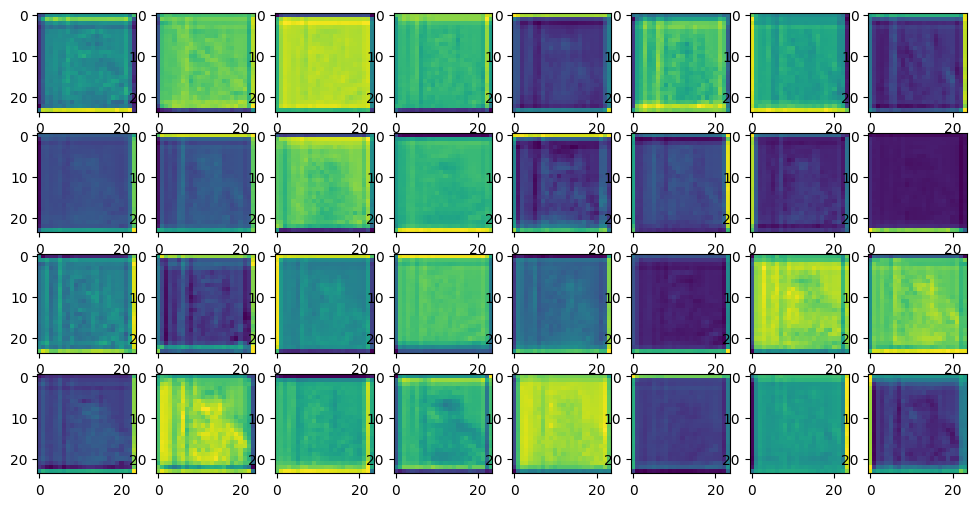

In [63]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

def train(model, train_loader, device):
    model.train()
    for inputs, targets in train_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)
    feature_maps=model(inputs)
    # Convert the tensor to a numpy array
    feature_maps = feature_maps.detach().numpy()
    print(feature_maps.shape)

    # Plot the feature maps
    fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(12, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(feature_maps[0][i])
    plt.show()
    return 

# Create the Network model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = Semantics(3,32)
model = net.to(device)
for epoch in range(num_epochs):
    train(model, train_loader , device)
       

In [66]:
import torch
import torch.nn as nn

class Lighting(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Lighting, self).__init__()

        # Feature Extractor in Low-Resolution Branch
        self.conv1a = nn.Sequential(
            nn.Conv2d(in_channels, 4, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.conv2a = nn.Sequential(
            nn.Conv2d(4, 8, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.conv3a = nn.Sequential(
            nn.Conv2d(8, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.conv4a = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )

        # Semantics Perception Block
        self.conv_inb = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv1b = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool1b = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2b = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool2b = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3b = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool3b = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4b = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool4b = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5b = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv6b = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=2, dilation=2),
            nn.PReLU()
        )
        self.conv5bd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv4bd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv3bd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv2bd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv1bd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool5b = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv7 = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )

        # Lighting Acquisition Block
        self.conv_inc = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv1c = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool1c = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2c = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool2c = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3c = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool3c = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4c = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool4c = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5c = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv6c = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1, dilation=2),
            nn.PReLU()
        )
        self.adaptive_avg = nn.AdaptiveAvgPool2d(1)
        self.adaptive_max = nn.AdaptiveMaxPool2d(1)
        self.conv7a1 = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=1, stride=1, padding=0),
            nn.LeakyReLU()
        )
        self.conv7a2 = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=1, stride=1, padding=0),
            nn.LeakyReLU()
        )
        self.conv7m1 = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=1, stride=1, padding=0),
            nn.LeakyReLU()
        )
        self.conv7m2 = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=1, stride=1, padding=0),
            nn.LeakyReLU()
        )
        self.conv7c = nn.Sequential(
            nn.Conv2d(48, 16, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU()
        )
        self.conv5cd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv4cd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv3cd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv2cd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv1cd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )        

    def forward(self, input):
        # Feature Extractor in Low-Resolution Branch
        conv1a = self.conv1a(input)
        conv2a = self.conv2a(conv1a)
        conv3a = self.conv3a(conv2a)
        conv4a = self.conv4a(conv3a)

        # Semantics Perception Block
        conv_inb = self.conv_inb(conv4a)
        conv1b = self.conv1b(conv_inb)
        maxpool1b = self.maxpool1b(conv1b)
        conv2b = self.conv2b(maxpool1b)
        maxpool2b = self.maxpool2b(conv2b)
        conv3b = self.conv3b(maxpool2b)
        maxpool3b = self.maxpool3b(conv3b)
        conv4b = self.conv4b(maxpool3b)
        maxpool4b = self.maxpool4b(conv4b)
        conv5b = self.conv5b(maxpool4b)
        conv6b = self.conv6b(conv5b)
        conv5bd = self.conv5bd(torch.cat([conv5b, conv6b], dim=1))
        UPconv5bd_resized = nn.functional.interpolate(self.upsample(conv5bd), size=(3, 3), mode='bilinear')
        conv4bd = self.conv4bd(torch.cat([UPconv5bd_resized, conv4b], dim=1))
        conv3bd = self.conv3bd(torch.cat([self.upsample(conv4bd), conv3b], dim=1))
        conv2bd = self.conv2bd(torch.cat([self.upsample(conv3bd), conv2b], dim=1))
        conv1bd = self.conv1bd(torch.cat([self.upsample(conv2bd), conv1b], dim=1))

        conv7 = self.conv7(torch.cat([conv1bd, conv1b], dim=1))
               # Lighting Acquisition Block
        conv_inc = self.conv_inc(conv7)
        print("conv_inc", conv_inc.shape)
        conv1c = self.conv1c(conv_inc)
        print("conv1c", conv1c.shape)
        maxpool1c = self.maxpool1c(conv1c)
        # print("maxpool1c", maxpool1c.shape)
        conv2c = self.conv2c(maxpool1c)
        # print("conv2c", conv2c.shape)
        maxpool2c = self.maxpool2c(conv2c)
        # print("maxpool2c", maxpool2c.shape)
        conv3c = self.conv3c(maxpool2c)
        # print("conv3c", conv3c.shape)
        maxpool3c = self.maxpool3c(conv3c)
        # print("maxpool3c", maxpool3c.shape)
        conv4c = self.conv4c(maxpool3c)
        # print("conv4c", conv4c.shape)
        maxpool4c = self.maxpool4c(conv4c)
        # print("maxpool4c", maxpool4c.shape)
        conv5c = self.conv5c(maxpool4c)
        # print("conv5c", conv5c.shape)
        conv6c = self.conv6c(conv5c)
        # print("conv6c", conv6c.shape)
        adaptive_avg = nn.functional.adaptive_avg_pool2d(conv5c, 1)
        adaptive_max = nn.functional.adaptive_max_pool2d(conv5c, 1)
        conv7a1 = self.conv7a1(adaptive_avg)
        conv7a2 = self.conv7a2(conv7a1)
        conv7m1 = self.conv7m1(adaptive_max)
        conv7m2 = self.conv7m2(conv7m1)
        conv7c = self.conv7c(torch.cat([self.upsample(conv6c), self.upsample(conv7a2), self.upsample(conv7m2)], dim=1))
        conv7c_resized = nn.functional.interpolate(conv7c, size=(1, 1), mode='bilinear')
        conv5cd = self.conv5cd(torch.cat([conv7c_resized, conv5c], dim=1))
        conv4cd = self.conv4cd(torch.cat([nn.functional.interpolate(conv5cd, size=(3, 3), mode='bilinear'), conv4c], dim=1))
        conv3cd = self.conv3cd(torch.cat([self.upsample(conv4cd), conv3c], dim=1))
        conv2cd = self.conv2cd(torch.cat([self.upsample(conv3cd), conv2c], dim=1))
        conv1cd = self.conv1cd(torch.cat([self.upsample(conv2cd), conv1c], dim=1))
        print("conv1cd", conv1cd.shape)
        print("self.upsample(conv1c + conv_inc)",self.upsample(conv1c + conv_inc).shape)

        return conv7

    def upsample(self, x):
        return nn.functional.interpolate(x, scale_factor=2, mode='bilinear')


In [67]:
import torch
import matplotlib.pyplot as plt

def train(model, train_loader, device):
    model.train()
    for inputs, targets in train_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)

    feature_maps=model(inputs)
    # Convert the tensor to a numpy array
    feature_maps = feature_maps.detach().numpy()
    print(feature_maps.shape)

    # Plot the feature maps
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(feature_maps[0][i])
    plt.show()
    return 

# Create the Network model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = Lighting(3,16)
model = net.to(device)
for epoch in range(num_epochs):
    train(model, train_loader , device)
       

conv_inc torch.Size([18, 32, 24, 24])
conv1c torch.Size([18, 16, 24, 24])


RuntimeError: Calculated padded input size per channel: (3 x 3). Kernel size: (5 x 5). Kernel size can't be greater than actual input size

In [323]:
import torch
import torch.nn as nn

class Fusion(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Fusion, self).__init__()

        # Feature Extractor in Low-Resolution Branch
        self.conv1a = nn.Sequential(
            nn.Conv2d(in_channels, 4, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.conv2a = nn.Sequential(
            nn.Conv2d(4, 8, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.conv3a = nn.Sequential(
            nn.Conv2d(8, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.conv4a = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )

        # Semantics Perception Block
        self.conv_inb = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv1b = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool1b = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2b = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool2b = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3b = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool3b = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4b = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool4b = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5b = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv6b = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=2, dilation=2),
            nn.PReLU()
        )
        self.conv5bd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv4bd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv3bd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv2bd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv1bd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool5b = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv7 = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )

        # Lighting Acquisition Block
        self.conv_inc = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv1c = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool1c = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2c = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool2c = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3c = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool3c = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4c = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool4c = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5c = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv6c = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=2, dilation=2),
            nn.PReLU()
        )
        self.adaptive_avg = nn.AdaptiveAvgPool2d(1)
        self.adaptive_max = nn.AdaptiveMaxPool2d(1)
        self.conv7a1 = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=1, stride=1, padding=0),
            nn.LeakyReLU()
        )
        self.conv7a2 = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=1, stride=1, padding=0),
            nn.LeakyReLU()
        )
        self.conv7m1 = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=1, stride=1, padding=0),
            nn.LeakyReLU()
        )
        self.conv7m2 = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=1, stride=1, padding=0),
            nn.LeakyReLU()
        )
        self.conv7c = nn.Sequential(
            nn.Conv2d(48, 16, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU()
        )
        self.conv5cd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv4cd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv3cd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv2cd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv1cd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )        

        # Fusion Adjustment Block
        self.conv_ind = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv1d = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool1d = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2d = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool2d = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3d = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool3d = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4d = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool4d = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5d = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv6d = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1, dilation=2),
            nn.PReLU()
        )
        self.conv5dd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv4dd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv3dd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv2dd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv1dd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv_p = nn.Sequential(
            nn.Conv2d(48, 32, kernel_size=1, stride=1, padding=0),
            nn.PReLU()
        )

    def forward(self, input):
        # Feature Extractor in Low-Resolution Branch
        conv1a = self.conv1a(input)
        conv2a = self.conv2a(conv1a)
        conv3a = self.conv3a(conv2a)
        conv4a = self.conv4a(conv3a)

        # Semantics Perception Block
        conv_inb = self.conv_inb(conv4a)
        conv1b = self.conv1b(conv_inb)
        maxpool1b = self.maxpool1b(conv1b)
        conv2b = self.conv2b(maxpool1b)
        maxpool2b = self.maxpool2b(conv2b)
        conv3b = self.conv3b(maxpool2b)
        maxpool3b = self.maxpool3b(conv3b)
        conv4b = self.conv4b(maxpool3b)
        maxpool4b = self.maxpool4b(conv4b)
        conv5b = self.conv5b(maxpool4b)
        conv6b = self.conv6b(conv5b)
        conv5bd = self.conv5bd(torch.cat([conv5b, conv6b], dim=1))
        UPconv5bd_resized = nn.functional.interpolate(self.upsample(conv5bd), size=(3, 3), mode='bilinear')
        conv4bd = self.conv4bd(torch.cat([UPconv5bd_resized, conv4b], dim=1))
        conv3bd = self.conv3bd(torch.cat([self.upsample(conv4bd), conv3b], dim=1))
        conv2bd = self.conv2bd(torch.cat([self.upsample(conv3bd), conv2b], dim=1))
        conv1bd = self.conv1bd(torch.cat([self.upsample(conv2bd), conv1b], dim=1))
        maxpool5b = self.maxpool5b(torch.cat([conv1bd, conv1b], dim=1))
        #! skipping maxpool5b 
        # conv7 = self.conv7(torch.cat([conv1bd, conv1b], dim=1))
        print("maxpool5b", maxpool5b.shape)
        maxpool5b=self.upsample(maxpool5b)
        print("self.upsample(maxpool5b)", maxpool5b.shape)

        # Lighting Acquisition Block
        conv_inc = self.conv_inc(maxpool5b)
        print("conv_inc", conv_inc.shape)
        conv1c = self.conv1c(conv_inc)
        print("conv1c", conv1c.shape)
        maxpool1c = self.maxpool1c(conv1c)
        # print("maxpool1c", maxpool1c.shape)
        conv2c = self.conv2c(maxpool1c)
        # print("conv2c", conv2c.shape)
        maxpool2c = self.maxpool2c(conv2c)
        # print("maxpool2c", maxpool2c.shape)
        conv3c = self.conv3c(maxpool2c)
        # print("conv3c", conv3c.shape)
        maxpool3c = self.maxpool3c(conv3c)
        # print("maxpool3c", maxpool3c.shape)
        conv4c = self.conv4c(maxpool3c)
        # print("conv4c", conv4c.shape)
        maxpool4c = self.maxpool4c(conv4c)
        # print("maxpool4c", maxpool4c.shape)
        conv5c = self.conv5c(maxpool4c)
        # print("conv5c", conv5c.shape)
        conv6c = self.conv6c(conv5c)
        # print("conv6c", conv6c.shape)
        adaptive_avg = nn.functional.adaptive_avg_pool2d(conv5c, 1)
        adaptive_max = nn.functional.adaptive_max_pool2d(conv5c, 1)
        conv7a1 = self.conv7a1(adaptive_avg)
        conv7a2 = self.conv7a2(conv7a1)
        conv7m1 = self.conv7m1(adaptive_max)
        conv7m2 = self.conv7m2(conv7m1)
        conv7c = self.conv7c(torch.cat([self.upsample(conv6c), self.upsample(conv7a2), self.upsample(conv7m2)], dim=1))
        conv7c_resized = nn.functional.interpolate(conv7c, size=(1, 1), mode='bilinear')
        conv5cd = self.conv5cd(torch.cat([conv7c_resized, conv5c], dim=1))
        conv4cd = self.conv4cd(torch.cat([nn.functional.interpolate(conv5cd, size=(3, 3), mode='bilinear'), conv4c], dim=1))
        conv3cd = self.conv3cd(torch.cat([self.upsample(conv4cd), conv3c], dim=1))
        conv2cd = self.conv2cd(torch.cat([self.upsample(conv3cd), conv2c], dim=1))
        conv1cd = self.conv1cd(torch.cat([self.upsample(conv2cd), conv1c], dim=1))
        print("conv1cd", conv1cd.shape)
        print("self.upsample(conv1c + conv_inc)",self.upsample(conv1c + conv_inc).shape)
        # Fusion Adjustment Block
        conv_ind = self.conv_ind(self.upsample(conv1c + conv_inc))
        conv1d = self.conv1d(conv_ind)
        maxpool1d = self.maxpool1d(conv1d)
        conv2d = self.conv2d(maxpool1d)
        maxpool2d = self.maxpool2d(conv2d)
        conv3d = self.conv3d(maxpool2d)
        maxpool3d = self.maxpool3d(conv3d)
        conv4d = self.conv4d(maxpool3d)
        maxpool4d = self.maxpool4d(conv4d)
        conv5d = self.conv5d(maxpool4d)
        conv6d = self.conv6d(conv5d)
        conv5dd = self.conv5dd(torch.cat([conv5d, conv6d], dim=1))
        conv4dd = self.conv4dd(torch.cat([self.upsample(conv5dd), conv4d], dim=1))
        conv3dd = self.conv3dd(torch.cat([self.upsample(conv4dd), conv3d], dim=1))
        conv2dd = self.conv2dd(torch.cat([self.upsample(conv3dd), conv2d], dim=1))
        conv1dd = self.conv1dd(torch.cat([self.upsample(conv2dd), conv1d], dim=1))
        conv_p = self.conv_p(torch.cat([conv1dd, conv_ind], dim=1))
        return conv_p
    

    def upsample(self, x):
        return nn.functional.interpolate(x, scale_factor=2, mode='bilinear')


In [324]:
import torch
import matplotlib.pyplot as plt

def train(model, train_loader, device):
    model.train()
    for inputs, targets in train_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)

    feature_maps=model(inputs)
    # Convert the tensor to a numpy array
    feature_maps = feature_maps.detach().numpy()
    print(feature_maps.shape)

    # Plot the feature maps
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(feature_maps[0][i])
        ax.axis('off')
    plt.show()
    return 

# Create the Network model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = Fusion(3,48)
model = net.to(device)
for epoch in range(num_epochs):
    train(model, train_loader , device)
       

maxpool5b torch.Size([18, 32, 12, 12])
self.upsample(maxpool5b) torch.Size([18, 32, 24, 24])
conv_inc torch.Size([18, 32, 24, 24])
conv1c torch.Size([18, 16, 24, 24])
conv1cd torch.Size([18, 16, 24, 24])


RuntimeError: The size of tensor a (16) must match the size of tensor b (32) at non-singleton dimension 1